In [24]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree

In [25]:
data = pd.read_csv("C:/Users/adm_usu/Downloads/cars.csv", sep=",")

In [26]:
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [27]:
data.shape

(56244, 12)

In [28]:
data.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


(array([10651.,  5933., 10992., 10325., 11344.,  3658.,  1833.,  1265.,
          194.,    49.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <BarContainer object of 10 artists>)

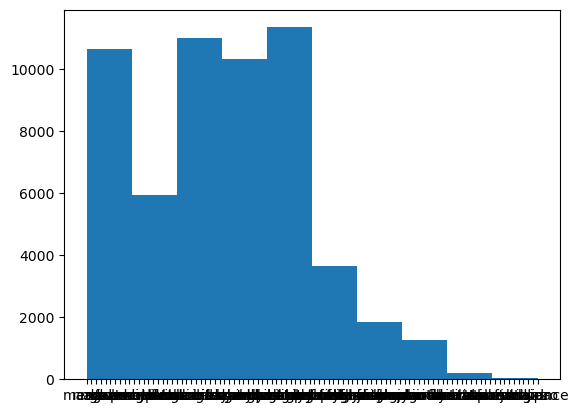

In [29]:
plt.hist(data.make)

In [59]:
predictors_col = ["year", "priceUSD"]
target_col = ['make']

In [60]:
predictors = data[predictors_col]
target = data[target_col]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [62]:
cars = DecisionTreeClassifier(max_depth=3)

In [63]:
cars.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [64]:
y_pred = cars.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.14739087918926128


[Text(0.5, 0.875, 'x[1] <= 5862.5\ngini = 0.947\nsamples = 44995\nvalue = [82, 183, 2, 1, 3243, 8, 3224, 1, 2, 68, 3, 54\n2, 63, 476, 411, 1619, 61, 256, 23, 14, 46, 3\n728, 2430, 2, 177, 69, 15, 55, 5, 3, 755, 1140\n204, 8, 24, 10, 64, 158, 964, 817, 93, 273, 288\n71, 30, 28, 3, 1628, 1, 2822, 6, 5, 83, 1084, 47\n1802, 2, 3034, 2291, 11, 28, 142, 19, 1, 8, 2988\n1, 237, 104, 1, 13, 9, 389, 1, 902, 24, 112, 299\n266, 1, 2, 12, 1749, 1, 110, 5435, 999, 5, 4, 54\n4]'),
 Text(0.25, 0.625, 'x[0] <= 1994.5\ngini = 0.945\nsamples = 24142\nvalue = [8, 166, 2, 0, 1700, 0, 1175, 1, 0, 4, 3, 10, 0\n45, 139, 309, 1148, 34, 254, 21, 9, 29, 3, 678\n1550, 2, 158, 32, 3, 17, 5, 0, 337, 481, 4, 8\n19, 10, 6, 37, 351, 688, 80, 39, 6, 21, 15, 28\n0, 1174, 0, 1081, 4, 0, 13, 644, 44, 889, 2\n2133, 1696, 11, 20, 4, 19, 1, 0, 2026, 1, 236\n77, 1, 7, 3, 286, 1, 252, 12, 26, 134, 130, 1\n2, 0, 453, 1, 95, 2600, 365, 2, 4, 54, 3]'),
 Text(0.125, 0.375, 'x[1] <= 826.0\ngini = 0.898\nsamples = 5523\nvalue = [0,

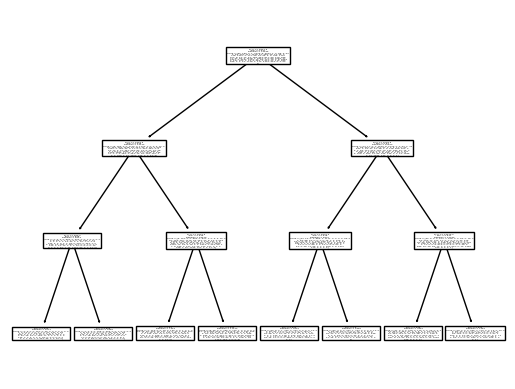

In [66]:
plot_tree(cars)

In [67]:
predicciones = cars.predict(X_test)

In [68]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,bmw,opel,renault,volkswagen
Actual,,,,
acura,5,1,0,10
alfa-romeo,1,14,27,2
aston-martin,1,0,0,0
audi,232,175,6,374
bentley,1,0,0,0
...,...,...,...,...
volkswagen,228,308,76,814
volvo,91,40,18,84
vortex,0,0,1,0
